# Use case wildfires: FWI 
## Scientific Assessment and Uncertainty Quantification (UQ) (DE340.15.1.3)

### This notebook presents the validation and uncertainty quantification of FWI indicators derived from various Climate DT simulations for the wildfire sector, using ERA5 data as the reference.


## Canadian Forest Fire Weather Index (FWI)


#### Fire weather: conditions conducive to the occurrence and sustaining of fires - compound of hot, dry and windy weather

#### FWI represents potential fire danger rather than actual fire occurrence

#### FWI account for significant drivers of fire weather (temperature, precipitation, relative humidity, and wind speed). 

#### Studies have found significant relationships between the FWI and the burned area, making index relevant for impact assessments.

#### Readily available input variables make FWI highly portable to be used at regional/global scale for fire danger prediction and warning systems, or fire danger projections under climate change.


## Structure of the FWI System

#### <span style="color:blue">Step1:</span> The moisture contents of organic materials: Fine Fuel Moisture Code (FFMC), the Duff Moisture Code (DMC) and the Drought Code (DC). 

#### <span style="color:blue">Step2:</span> Two indices are deduced from these moisture contents. The Initial Spread Index (ISI) is an indicator for the likely rate of fire spread, while the Buildup Index (BUI) encompasses the fuel available for combustion

#### <span style="color:blue">Step3:</span>: Together, they are used to deduce the FWI rating the fire intensity.




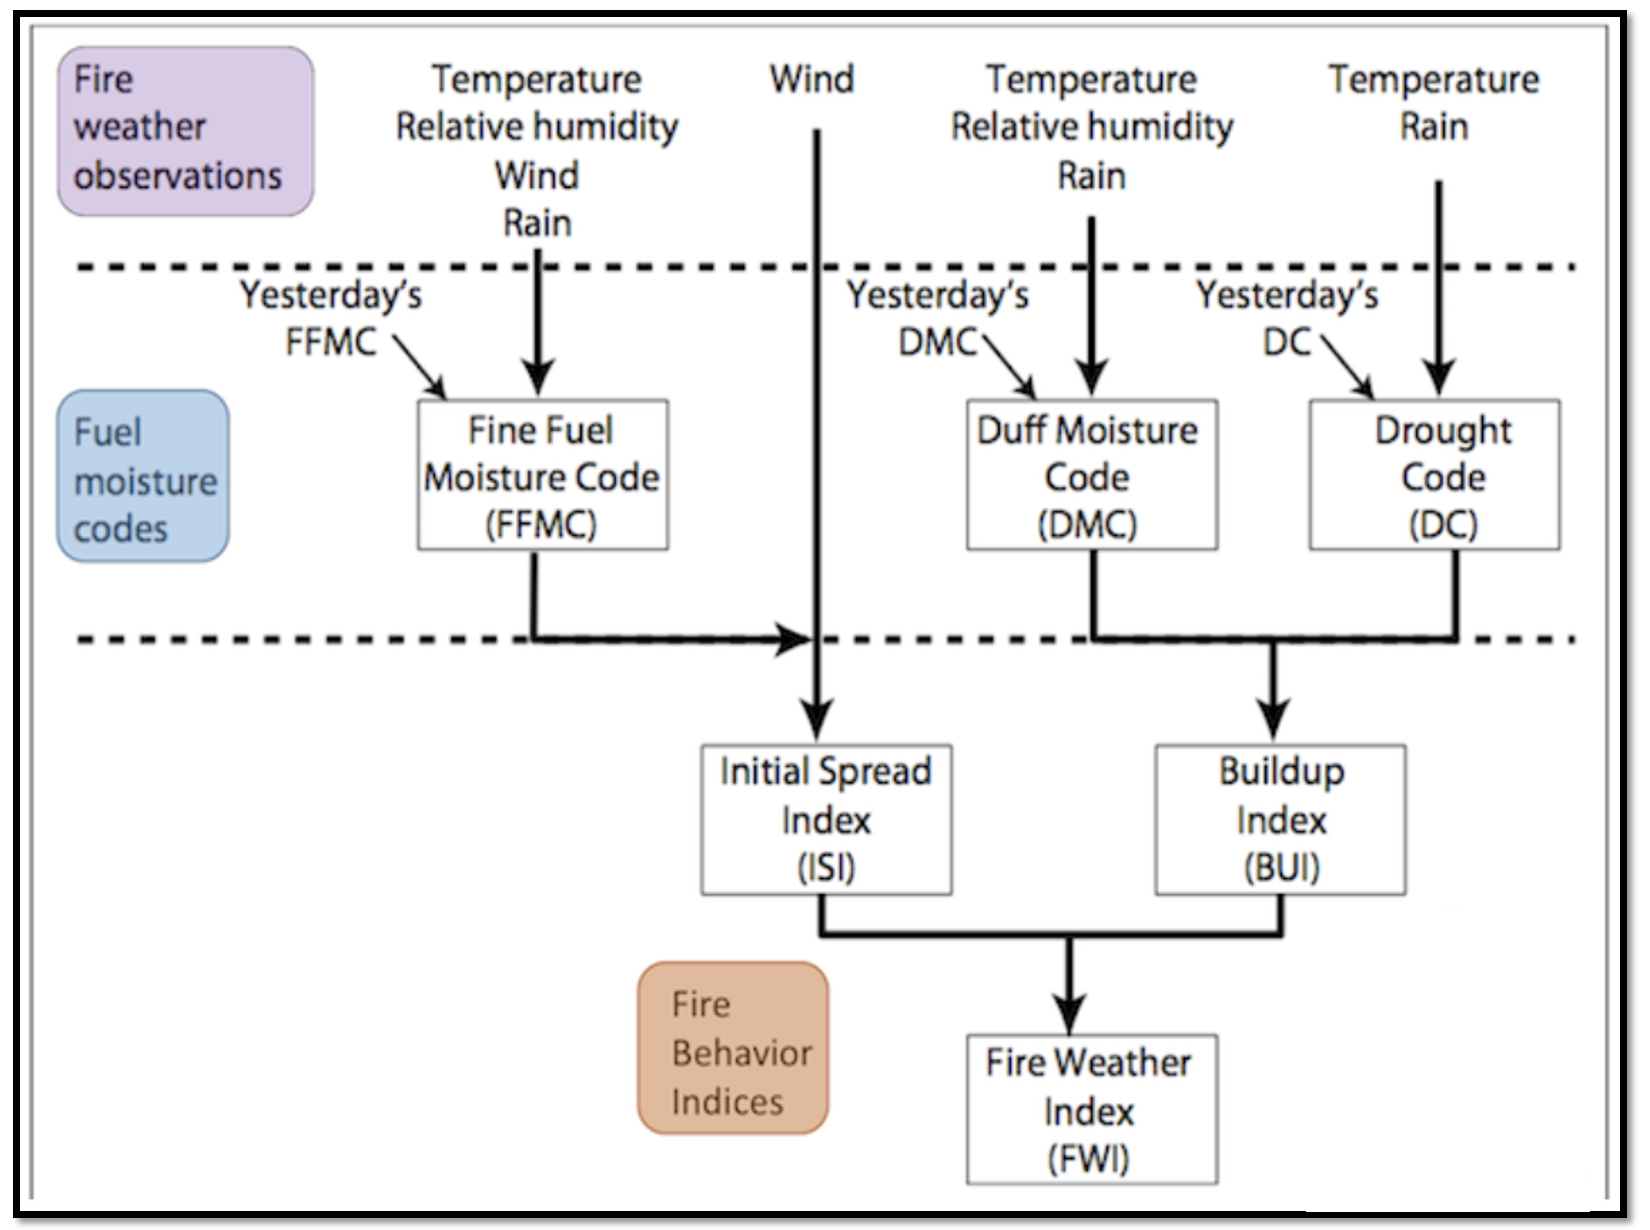




## Fire Danger Classes
#### The European Forrest Fire Information System classifications of fire danger 

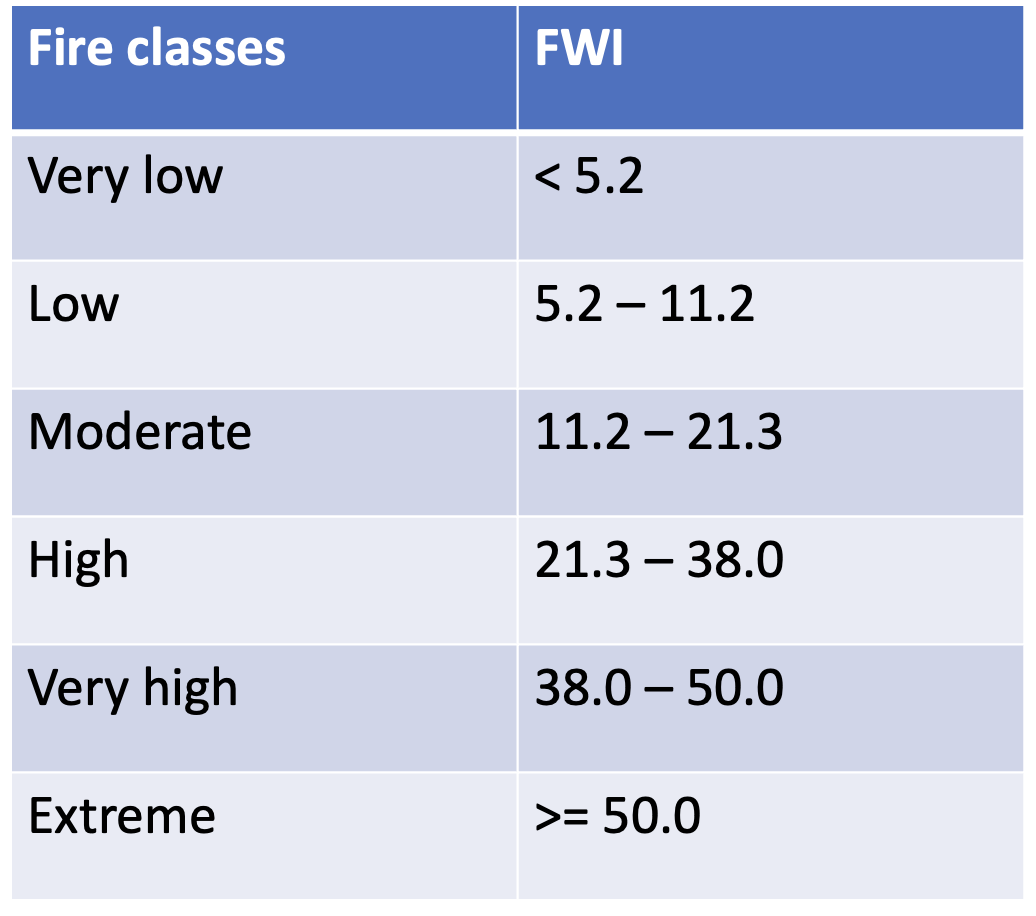

## Climate DT Simulations Used
### historical & 3-member historical Ensembles
- **Period:** 1990–2014 (25 years) 
- **Model:** IFS-NEMO  
- **Resolution:** 10 km horizontal   

## Scientific Assessment and UQ Components
- **Comparison with ERA5**
- **Mean Bias: Mean, Min, Max, Percentile, and fire danger classes**
- **Seasonal cycle**
- **Trend**
-   

## Methodology
The FWI daily indicators are calculated using the ERA5 reference dataset offline. 

ClimateDT simulations are regridded onto the ERA5 grid using bilinear interpolation for the FWI indicators.


## Contact

📧 suraj.polade@fmi.fi

Responsible: Suraj Polade (FMI) 


In [51]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")
import os
import numpy as np
np.warnings = warnings
import xarray as xr
import xesmf as xe
import numpy as np
import warnings
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd  
import datetime as dt
import xesmf as xe

from robinson_panel import plot_robinson_panel
from regrid_utils import regrid_to_reference
from seasonal_cycle_ref_vs_model import plot_seasonal_cycle_ref_vs_model
from plot_fwi_trends import plot_ref_model_timeseries_with_trends

##  Data path

In [2]:
dat_path  = '/Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/'
plot_dir  = '/Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/'

## Read the statistics


In [3]:
# Read ERA5 stat
ref_in = 'ERA5/'

ds_fwi_mean  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_mean.nc")
ds_fwi_max   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_max.nc")
ds_fwi_min   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_min.nc")
ds_fwi_50per = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_50per.nc")
ds_fwi_95per = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_95per.nc")
ds_fwi_99per  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_99per.nc")

ds_fwi_VLow  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_VLow.nc")
ds_fwi_Low   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_Low.nc")
ds_fwi_Mod   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_Mod.nc")
ds_fwi_High  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_High.nc")
ds_fwi_VHigh = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_VHigh.nc")
ds_fwi_Ext   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_Ext.nc")

fwi_VLow_days    = (ds_fwi_VLow['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_Low_days     = (ds_fwi_Low['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_Mod_days     = (ds_fwi_Mod['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_High_days    = (ds_fwi_High['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_VHigh_days   = (ds_fwi_VHigh['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_Ext_days     = (ds_fwi_Ext['fwi'] / np.timedelta64(1, 'D')).astype('float32')

ds_fwi_sea_Europe        = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_Europe.nc")
ds_fwi_sea_NorthAmerica  = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_NorthAmerica.nc")
ds_fwi_sea_Asia          = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_Asia.nc")
ds_fwi_sea_Africa        = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_Africa.nc")
ds_fwi_sea_SouthAmerica  = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_SouthAmerica.nc")



In [4]:
# Read Model stat
ref_in = 'FWI_IFS_NIMO_Production_hist/'

print(dat_path + ref_in + "Clim_fwi_mean.nc")

ds_fwi_mean_H  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_mean.nc")
ds_fwi_max_H   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_max.nc")
ds_fwi_min_H   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_min.nc")
ds_fwi_50per_H = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_50per.nc")
ds_fwi_95per_H = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_95per.nc")
ds_fwi_99per_H  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_99per.nc")

ds_fwi_VLow_H  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_VLow.nc")
ds_fwi_Low_H   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_Low.nc")
ds_fwi_Mod_H   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_Mod.nc")
ds_fwi_High_H  = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_High.nc")
ds_fwi_VHigh_H = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_VHigh.nc")
ds_fwi_Ext_H   = xr.open_mfdataset(dat_path + ref_in + "Clim_fwi_days_Ext.nc")


fwi_VLow_days_H    = (ds_fwi_VLow_H['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_Low_days_H     = (ds_fwi_Low_H['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_Mod_days_H     = (ds_fwi_Mod_H['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_High_days_H    = (ds_fwi_High_H['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_VHigh_days_H   = (ds_fwi_VHigh_H['fwi'] / np.timedelta64(1, 'D')).astype('float32')
fwi_Ext_days_H     = (ds_fwi_Ext_H['fwi'] / np.timedelta64(1, 'D')).astype('float32')

ds_fwi_sea_Europe_H        = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_Europe.nc")
ds_fwi_sea_NorthAmerica_H  = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_NorthAmerica.nc")
ds_fwi_sea_Asia_H          = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_Asia.nc")
ds_fwi_sea_Africa_H        = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_Africa.nc")
ds_fwi_sea_SouthAmerica_H  = xr.open_mfdataset(dat_path + ref_in + "1994_2014_fwi_dailyclim_SouthAmerica.nc")


/Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_IFS_NIMO_Production_hist/Clim_fwi_mean.nc


In [5]:
# First regrid weight
ds_fwi_mean_H_Re = regrid_to_reference(
    src=ds_fwi_mean_H,
    ref=ds_fwi_mean,
    var_name="fwi",
    method="bilinear",
    weights_file="weights_fwi_bilinear_H_to_mean.nc",  # created on first run
    periodic=True,
    chunking=None,
    return_as_dataset=True,
)

In [6]:
#ds_fwi_mean_H_Re = regrid_to_reference(ds_fwi_mean_H, ds_fwi_mean)

ds_fwi_mean_H_Re = regrid_to_reference(ds_fwi_mean_H, ds_fwi_mean, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_max_H_Re = regrid_to_reference(ds_fwi_max_H, ds_fwi_max, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_min_H_Re = regrid_to_reference(ds_fwi_min_H, ds_fwi_min, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_50per_H_Re = regrid_to_reference(ds_fwi_50per_H, ds_fwi_50per, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_95per_H_Re = regrid_to_reference(ds_fwi_95per_H, ds_fwi_95per, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_99per_H_Re = regrid_to_reference(ds_fwi_99per_H, ds_fwi_99per, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")


ds_fwi_VLow_H_Re = regrid_to_reference(fwi_VLow_days_H, fwi_VLow_days, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_Low_H_Re = regrid_to_reference(fwi_Low_days_H, fwi_Low_days, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_Mod_H_Re = regrid_to_reference(fwi_Mod_days_H, fwi_Mod_days, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_High_H_Re = regrid_to_reference(fwi_High_days_H, fwi_High_days, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_VHigh_H_Re = regrid_to_reference(fwi_VHigh_days_H, fwi_VHigh_days, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")

ds_fwi_Ext_H_Re = regrid_to_reference(fwi_Ext_days_H, fwi_Ext_days, "fwi",
                                       weights_file="weights_fwi_bilinear_H_to_mean.nc")


In [ ]:
# Calculate the Biases
fwi_mean_Bias  = ds_fwi_mean_H_Re['fwi']  - ds_fwi_mean['fwi']
fwi_max_Bias   = ds_fwi_max_H_Re['fwi']   - ds_fwi_max['fwi']  
fwi_min_Bias   = ds_fwi_min_H_Re['fwi']   - ds_fwi_min['fwi']  
fwi_50per_Bias = ds_fwi_50per_H_Re['fwi'] - ds_fwi_50per['fwi']  
fwi_95per_Bias = ds_fwi_95per_H_Re['fwi'] - ds_fwi_95per['fwi']  
fwi_99per_Bias = ds_fwi_99per_H_Re['fwi'] - ds_fwi_99per['fwi'] 

fwi_VLow_Bias  = ds_fwi_VLow_H_Re  - fwi_VLow_days
fwi_Low_Bias   = ds_fwi_Low_H_Re   - fwi_Low_days
fwi_Mod_Bias   = ds_fwi_Mod_H_Re   - fwi_Mod_days 
fwi_High_Bias  = ds_fwi_High_H_Re  - fwi_High_days 
fwi_VHigh_Bias = ds_fwi_VHigh_H_Re - fwi_VHigh_days 
fwi_Ext_Bias   = ds_fwi_Ext_H_Re   - fwi_Ext_days

In [11]:
ds_fwi_mean_H_Re

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 721, lon: 1440)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    fwi      (lat, lon) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>

In [8]:
# ERA5 Land Sea Mask
ref_in = 'ERA5/'
ds_lsm = xr.open_dataset(dat_path + ref_in  + "ERA5_Land_Sea_Mask.nc")
ds_lsm = ds_lsm.rename({'longitude': 'lon','latitude': 'lat'})
ds_lsm = ds_lsm.squeeze()
ds_lsm.to_netcdf(path=os.path.join(dat_path, ref_in, "ERA5_Land_Sea_Mask_Mod.nc"))

In [9]:
# Mask the ClimnateDT Ocean grid

lsm = ds_lsm.squeeze()
if isinstance(lsm, xr.Dataset):
    # pick the actual mask var if ds_lsm is a Dataset (change 'lsm' if needed)
    lsm = lsm[list(lsm.data_vars)[0]]
land_mask = lsm > 0.5

fwi_mean_Bias_Land  = fwi_mean_Bias.where(land_mask) 
fwi_max_Bias_Land   = fwi_max_Bias.where(land_mask) 
fwi_min_Bias_Land   = fwi_min_Bias.where(land_mask) 
fwi_50per_Bias_Land = fwi_50per_Bias.where(land_mask)  
fwi_95per_Bias_Land = fwi_95per_Bias.where(land_mask)  
fwi_99per_Bias_Land = fwi_95per_Bias.where(land_mask)  

fwi_VLow_Bias_Land  = fwi_VLow_Bias.where(land_mask)  
fwi_Low_Bias_Land   = fwi_Low_Bias.where(land_mask)    
fwi_Mod_Bias_Land   = fwi_Mod_Bias.where(land_mask)    
fwi_High_Bias_Land  = fwi_High_Bias.where(land_mask)   
fwi_VHigh_Bias_Land = fwi_VHigh_Bias.where(land_mask)  
fwi_Ext_Bias_Land   = fwi_Ext_Bias.where(land_mask)   

In [16]:
fwi_mean_H_Land   = ds_fwi_mean_H_Re.where(land_mask)  
fwi_max_H_Land    = ds_fwi_max_H_Re.where(land_mask) 
fwi_min_H_Land    = ds_fwi_min_H_Re.where(land_mask) 
fwi_50per_H_Land  = ds_fwi_50per_H_Re.where(land_mask) 
fwi_95per_H_Land  = ds_fwi_95per_H_Re.where(land_mask) 
fwi_99per_H_Land  = ds_fwi_99per_H_Re.where(land_mask) 

fwi_VLow_H_Land  = ds_fwi_VLow_H_Re.where(land_mask)  
fwi_Low_H_Land   = ds_fwi_Low_H_Re.where(land_mask)  
fwi_Mod_H_Land   = ds_fwi_Mod_H_Re.where(land_mask)   
fwi_High_H_Land  = ds_fwi_High_H_Re.where(land_mask)  
fwi_VHigh_H_Land = ds_fwi_VHigh_H_Re.where(land_mask)  
fwi_Ext_H_Land   = ds_fwi_Ext_H_Re.where(land_mask)  


fwi_mean_Land  = ds_fwi_mean.where(land_mask) 
fwi_max_Land   = ds_fwi_max.where(land_mask) 
fwi_min_Land   = ds_fwi_min.where(land_mask) 
fwi_50per_Land = ds_fwi_50per.where(land_mask) 
fwi_95per_Land = ds_fwi_95per.where(land_mask) 
fwi_99per_Land = ds_fwi_99per.where(land_mask) 

fwi_VLow_Land  = fwi_VLow_days.where(land_mask) 
fwi_Low_Land   = fwi_Low_days.where(land_mask) 
fwi_Mod_Land   = fwi_Mod_days.where(land_mask) 
fwi_High_Land  = fwi_High_days.where(land_mask) 
fwi_VHigh_Land = fwi_VHigh_days.where(land_mask) 
fwi_Ext_Land   = fwi_Ext_days.where(land_mask) 


#fwi_Ext_Bias_LAnd['fwi'].plot()

[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Global_Clim.png


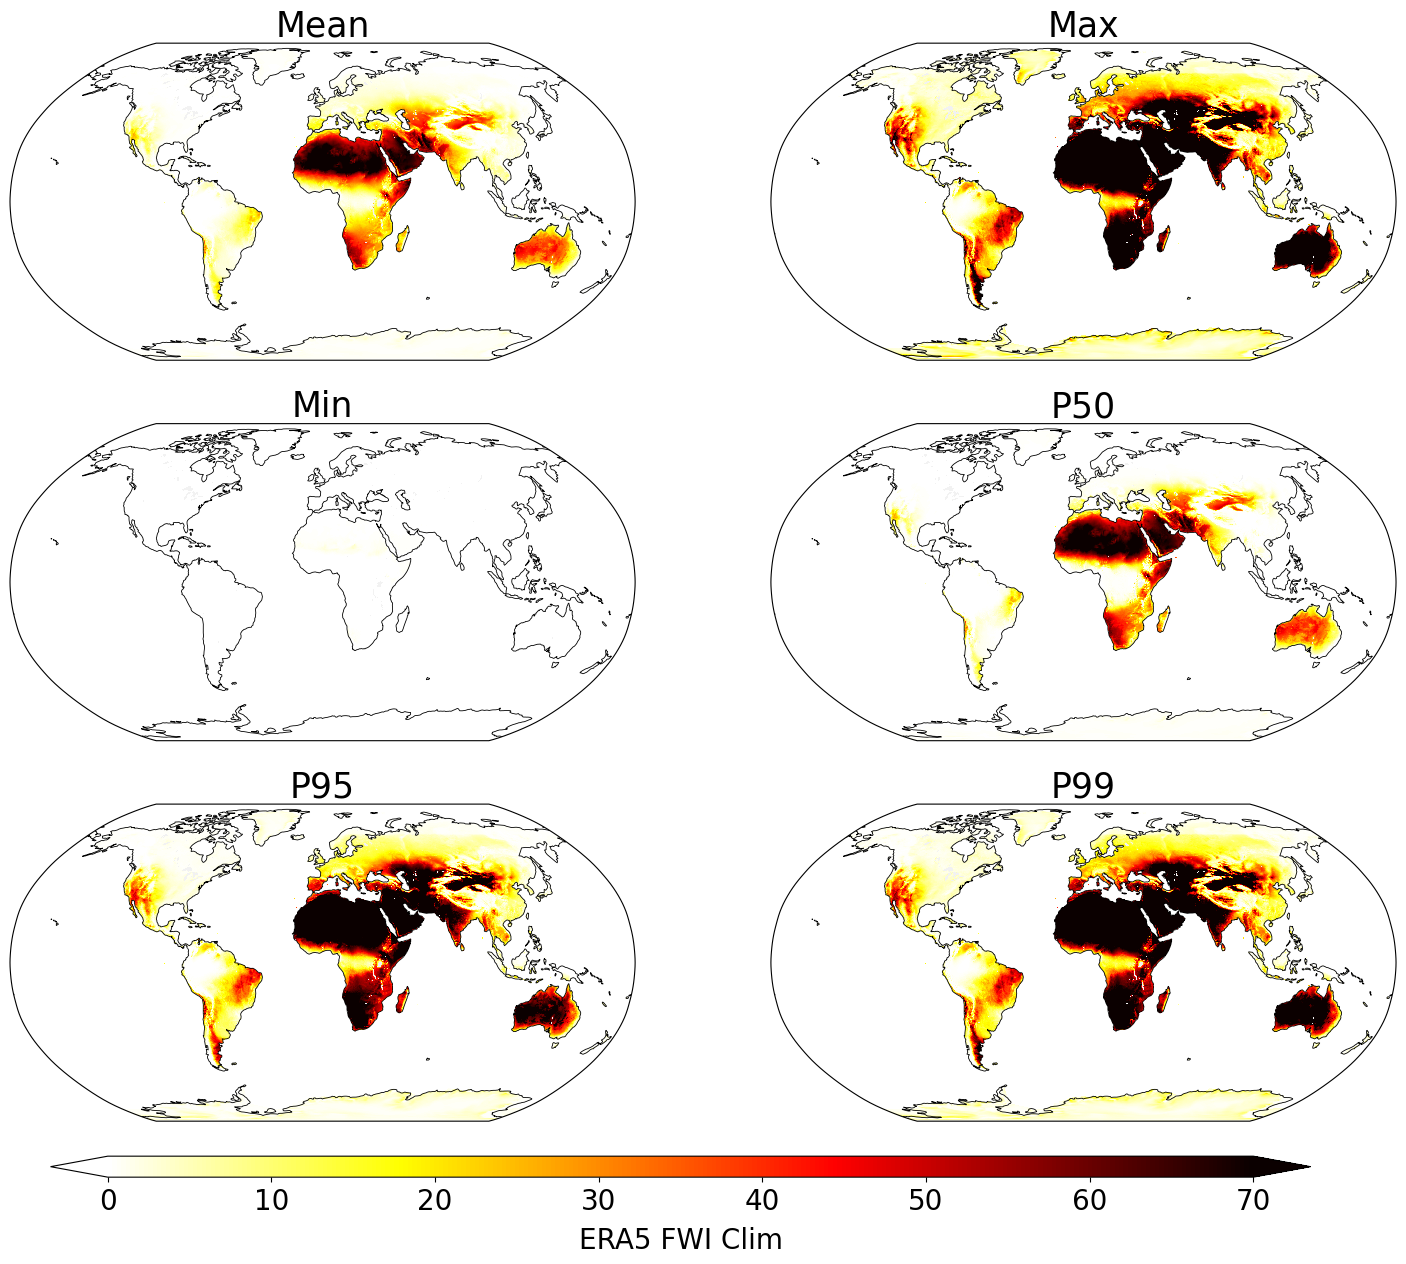

In [26]:
# Plot Global Map Clim
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_mean_Land, fwi_max_Land, fwi_min_Land,
        fwi_50per_Land, fwi_95per_Land, fwi_99per_Land,
    ],    
    titles=["Mean","Max","Min","P50","P95","P99"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="hot_r", center=None, vmin=0, vmax=70,
    cbar_label="ERA5 FWI Clim",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="global",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Global_Clim.png",
    show=True
)


[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Global_Clim_days.png


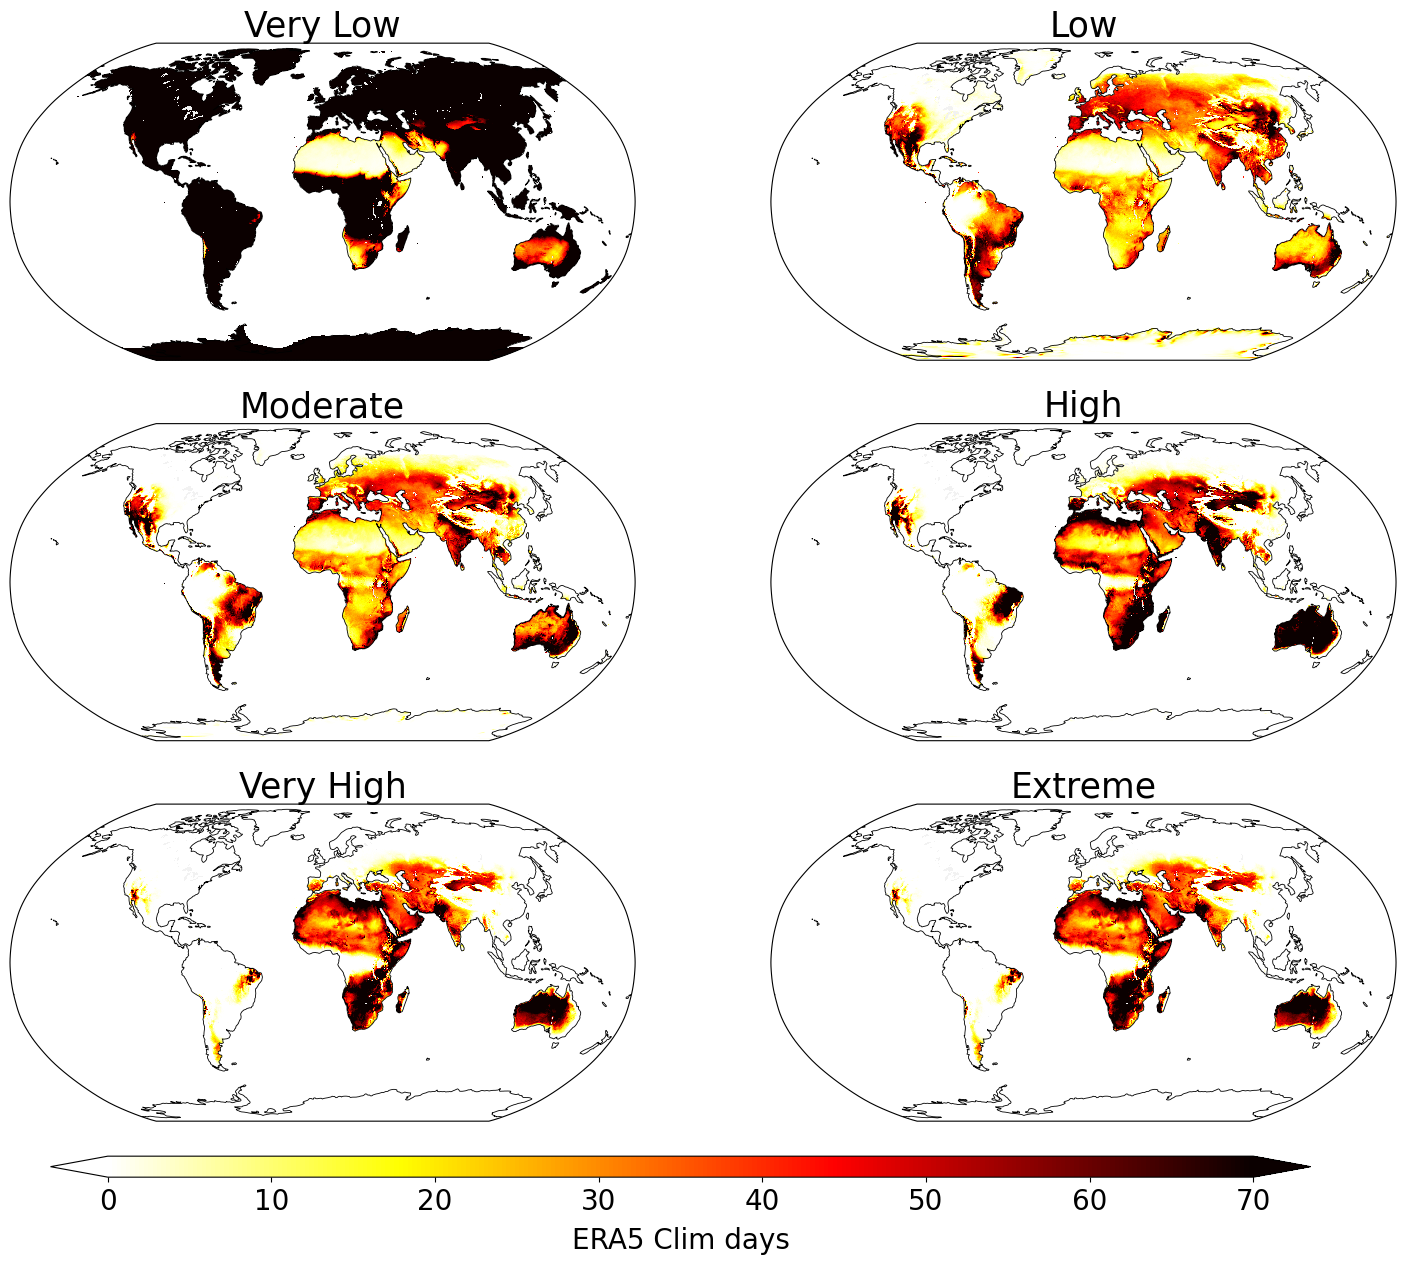

In [27]:
# Plot Global Map Clim
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_VLow_Land, fwi_Low_Land, fwi_Mod_Land,
        fwi_High_Land, fwi_VHigh_Land, fwi_VHigh_Land,
    ],    
    titles=["Very Low","Low","Moderate","High","Very High","Extreme"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="hot_r", center=None, vmin=0, vmax=70,
    cbar_label="ERA5 Clim days",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="global",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Global_Clim_days.png",
    show=True
)


[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Europe_Clim.png


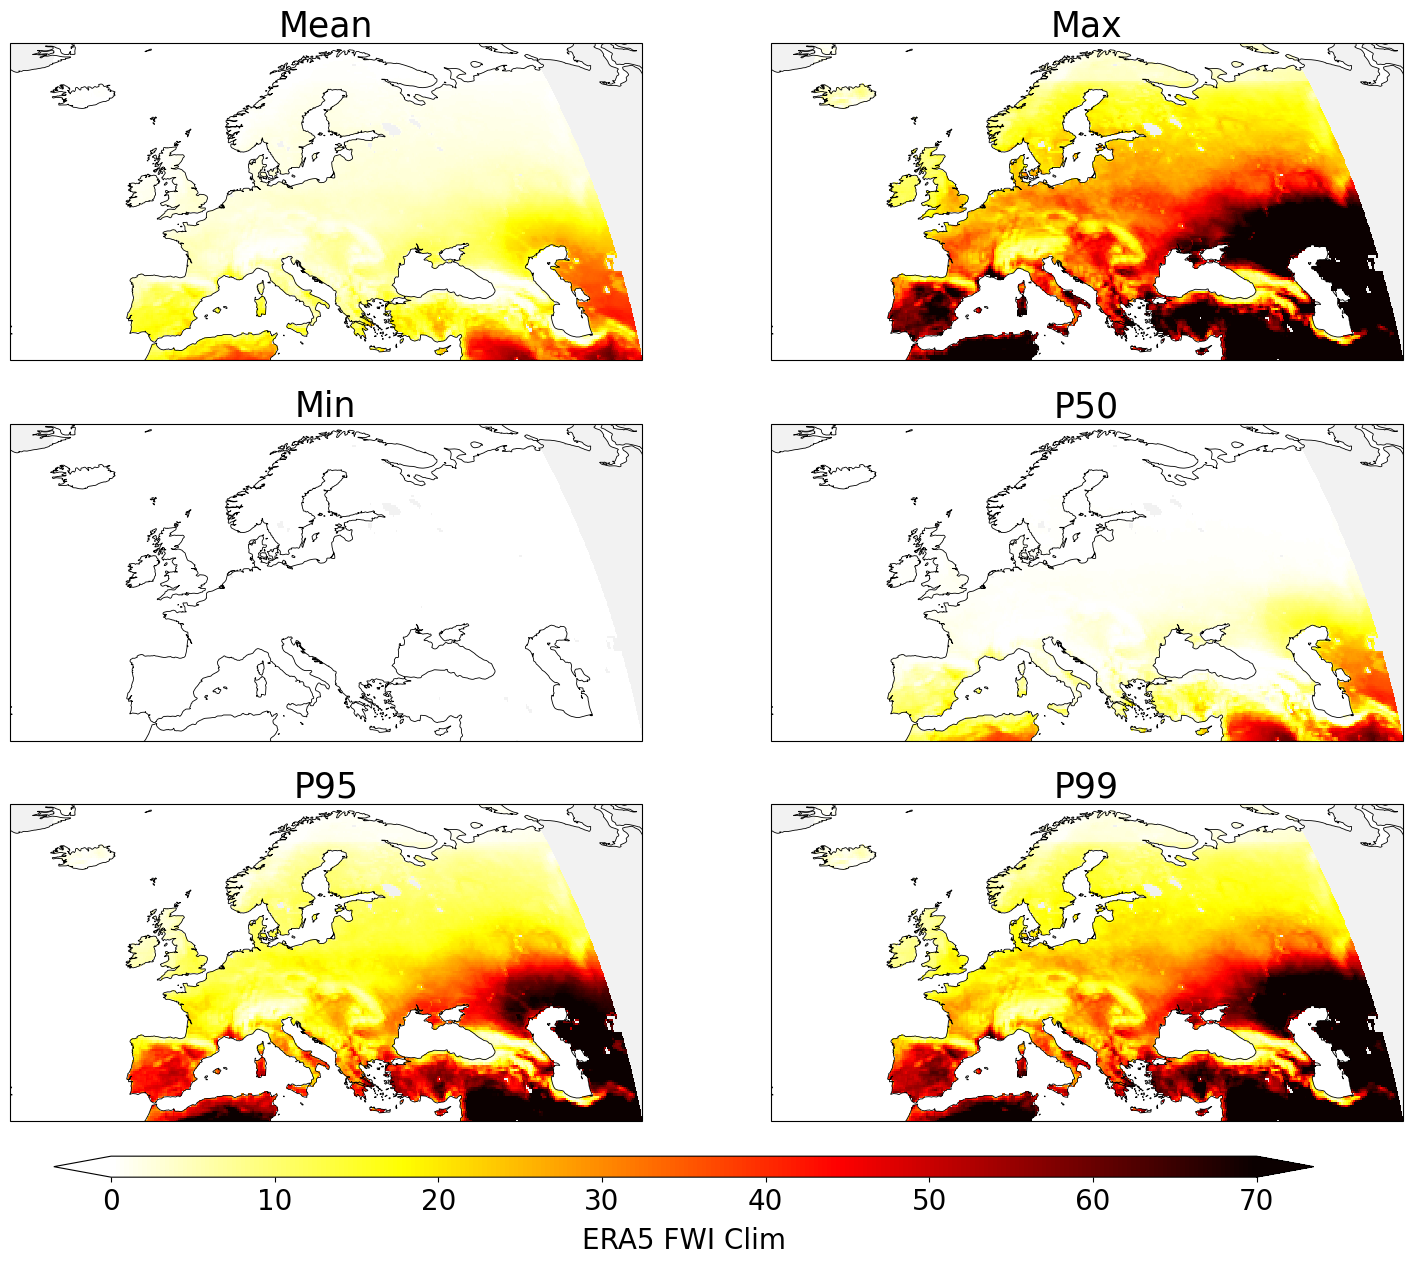

In [28]:
# Plot Europe Map Clim
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_mean_Land, fwi_max_Land, fwi_min_Land,
        fwi_50per_Land, fwi_95per_Land, fwi_99per_Land,
    ],    
    titles=["Mean","Max","Min","P50","P95","P99"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="hot_r", center=None, vmin=0, vmax=70,
    cbar_label="ERA5 FWI Clim",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="europe",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Europe_Clim.png",
    show=True
)


[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Europe_Clim_days.png


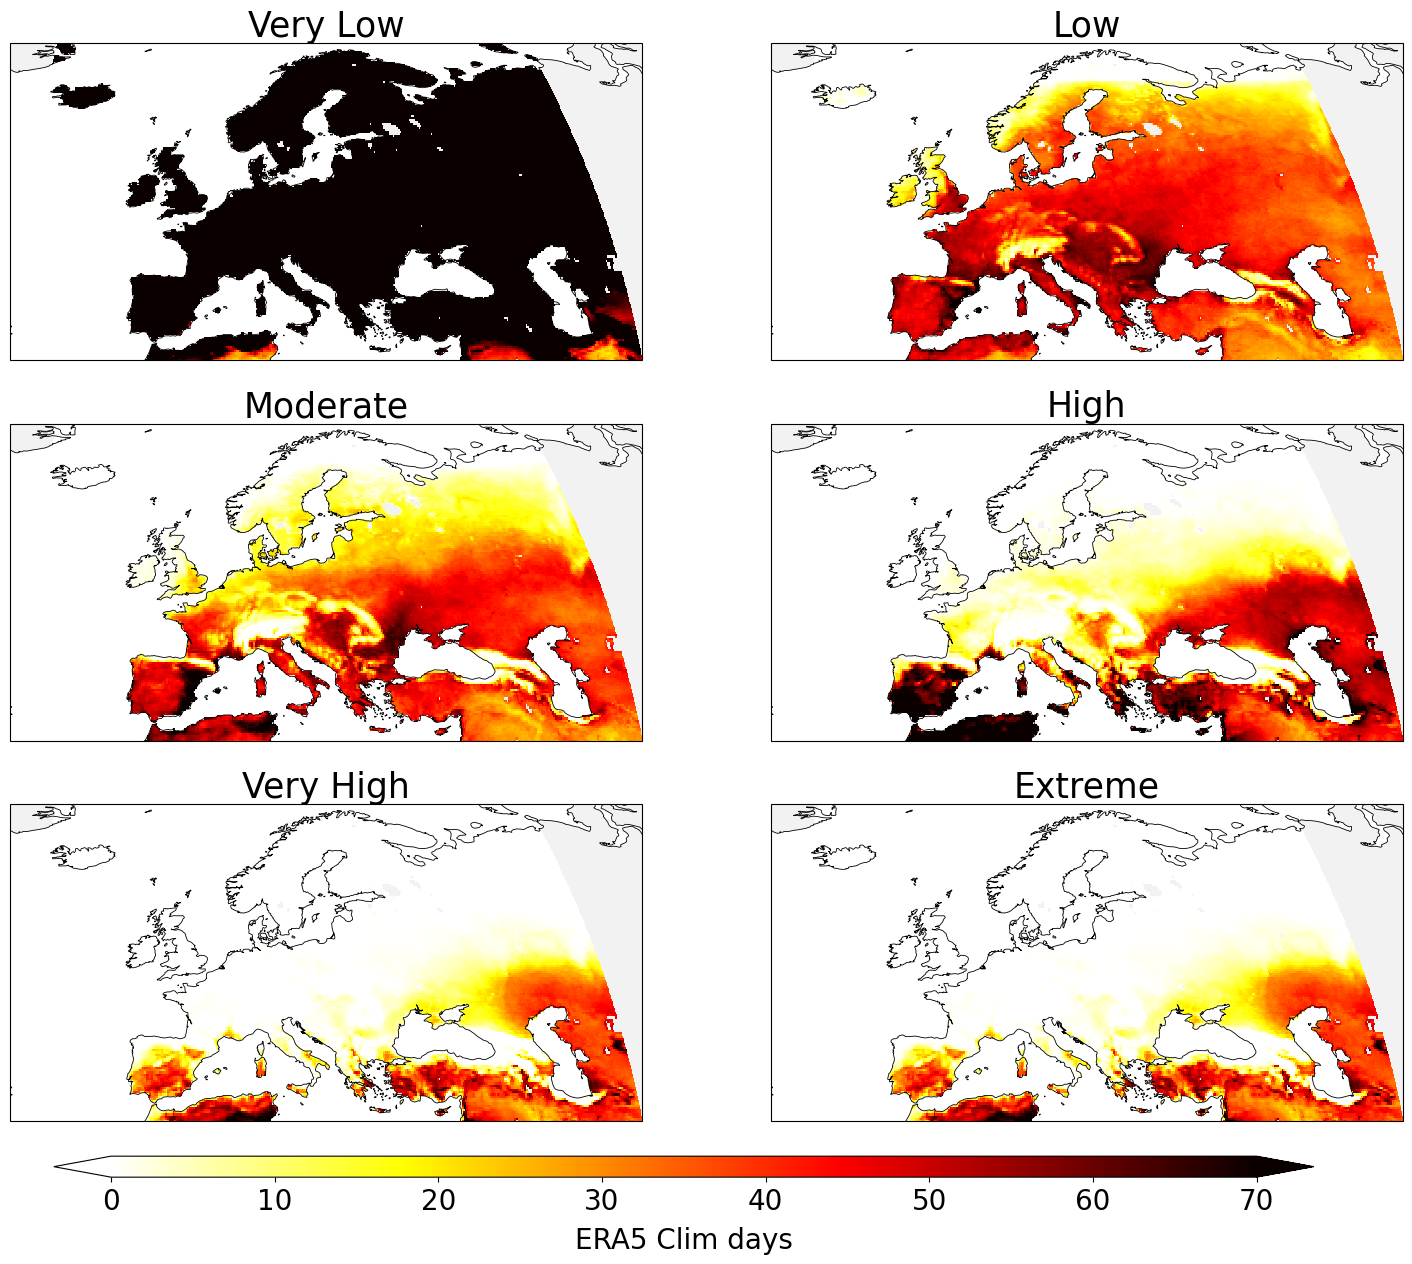

In [29]:
# Plot Europe Map Clim
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_VLow_Land, fwi_Low_Land, fwi_Mod_Land,
        fwi_High_Land, fwi_VHigh_Land, fwi_VHigh_Land,
    ],    
    titles=["Very Low","Low","Moderate","High","Very High","Extreme"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="hot_r", center=None, vmin=0, vmax=70,
    cbar_label="ERA5 Clim days",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="europe",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Europe_Clim_days.png",
    show=True
)


In [ ]:
## Plot Global Map 
#fig, axes, cb = plot_robinson_panel(
#    data_list=[
#        fwi_mean_Bias_Land, fwi_max_Bias_Land, fwi_min_Bias_Land,
#        fwi_50per_Bias_Land, fwi_95per_Bias_Land, fwi_99per_Bias_Land,
#        fwi_VLow_Bias_Land, fwi_Low_Bias_Land, fwi_Mod_Bias_Land,
#        fwi_High_Bias_Land, fwi_VHigh_Bias_Land, fwi_Ext_Bias_Land,
#    ],
#    titles=["Mean","Max","Min","P50","P95","P99","Very Low","Low","Moderate","High","Very High","Extreme"],
#    nrows=6, ncols=2,
#    figsize=(18, 26),
#    cmap="RdBu_r", center=0, vmin=-5, vmax=5,
#    cbar_label="FWI bias (hist − ref)",
#    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
#    zoom_to="global",                         # or "globe" for no crop
#    save_png=  plot_dir + "FWI_BIAS_Global.png",
#    show=True
#)



[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Global_Clim_Bias_global.png


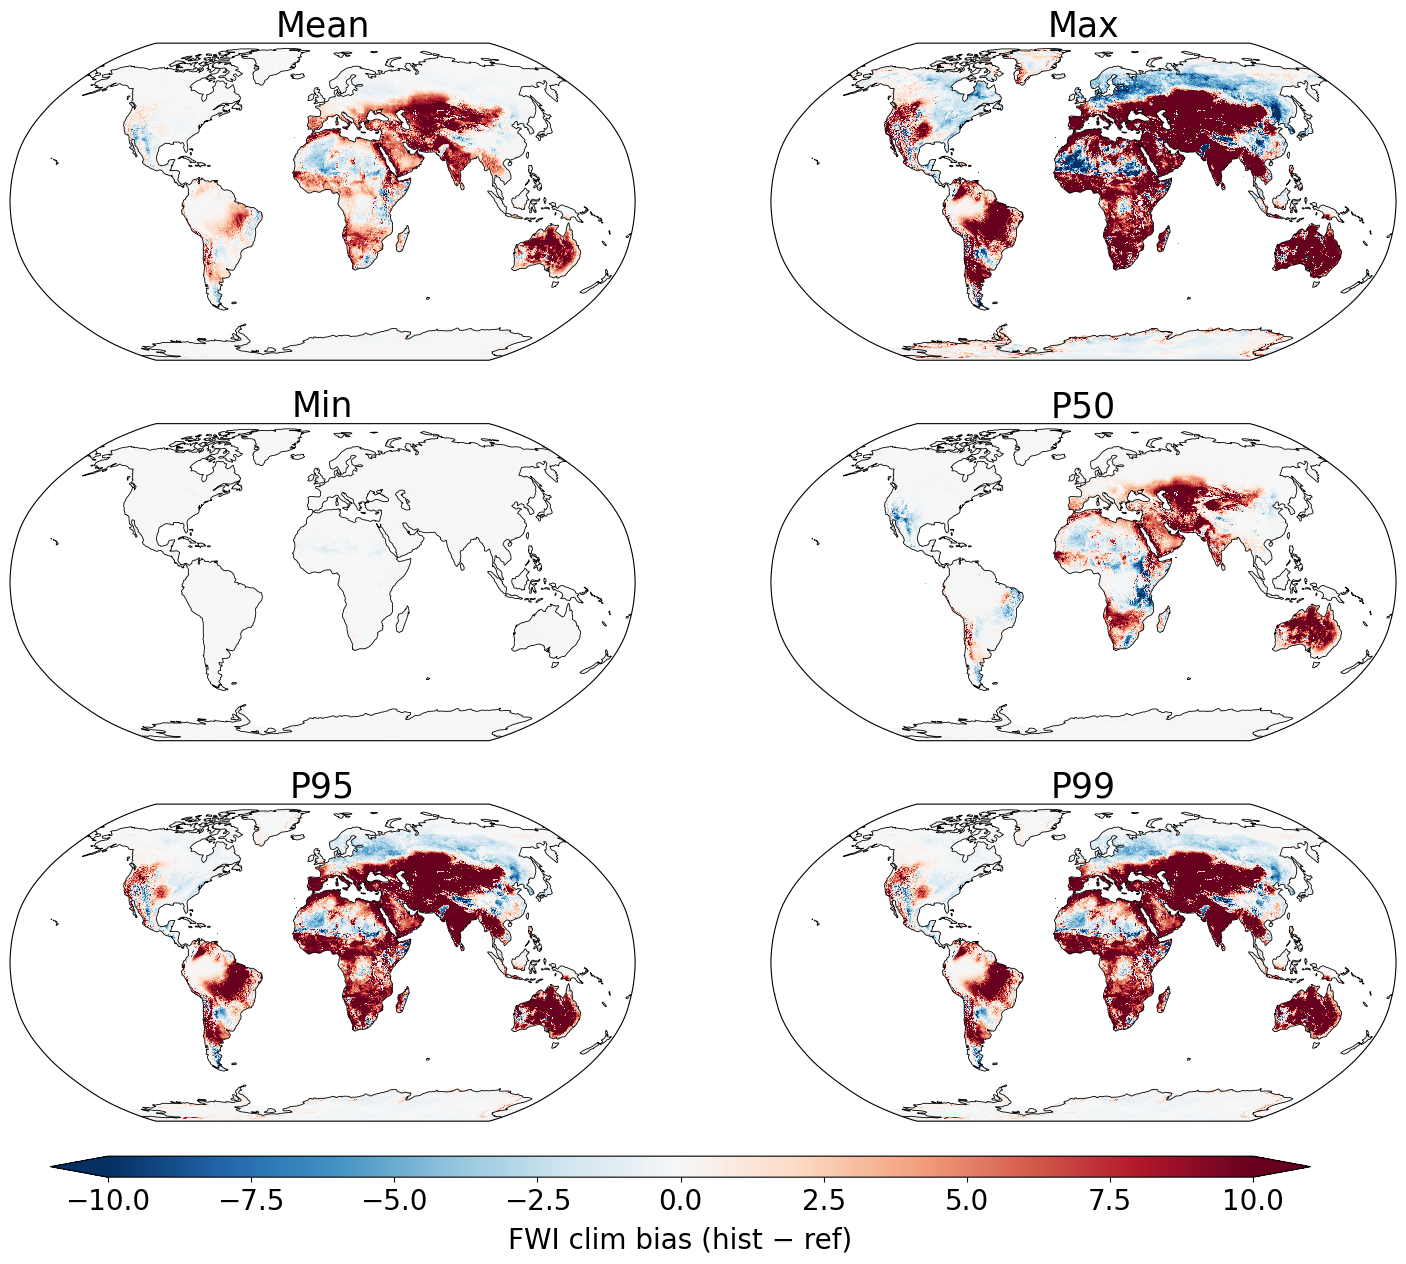

In [35]:
# Plot Global Map Bias
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_mean_Bias_Land, fwi_max_Bias_Land, fwi_min_Bias_Land,
        fwi_50per_Bias_Land, fwi_95per_Bias_Land, fwi_99per_Bias_Land,
    ],    
    titles=["Mean","Max","Min","P50","P95","P99"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="RdBu_r", center=0, vmin=-10, vmax=10,
    cbar_label="FWI clim bias (hist − ref)",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="global",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Global_Clim_Bias_global.png",
    show=True
)

[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Global_Clim_Bias_days.png


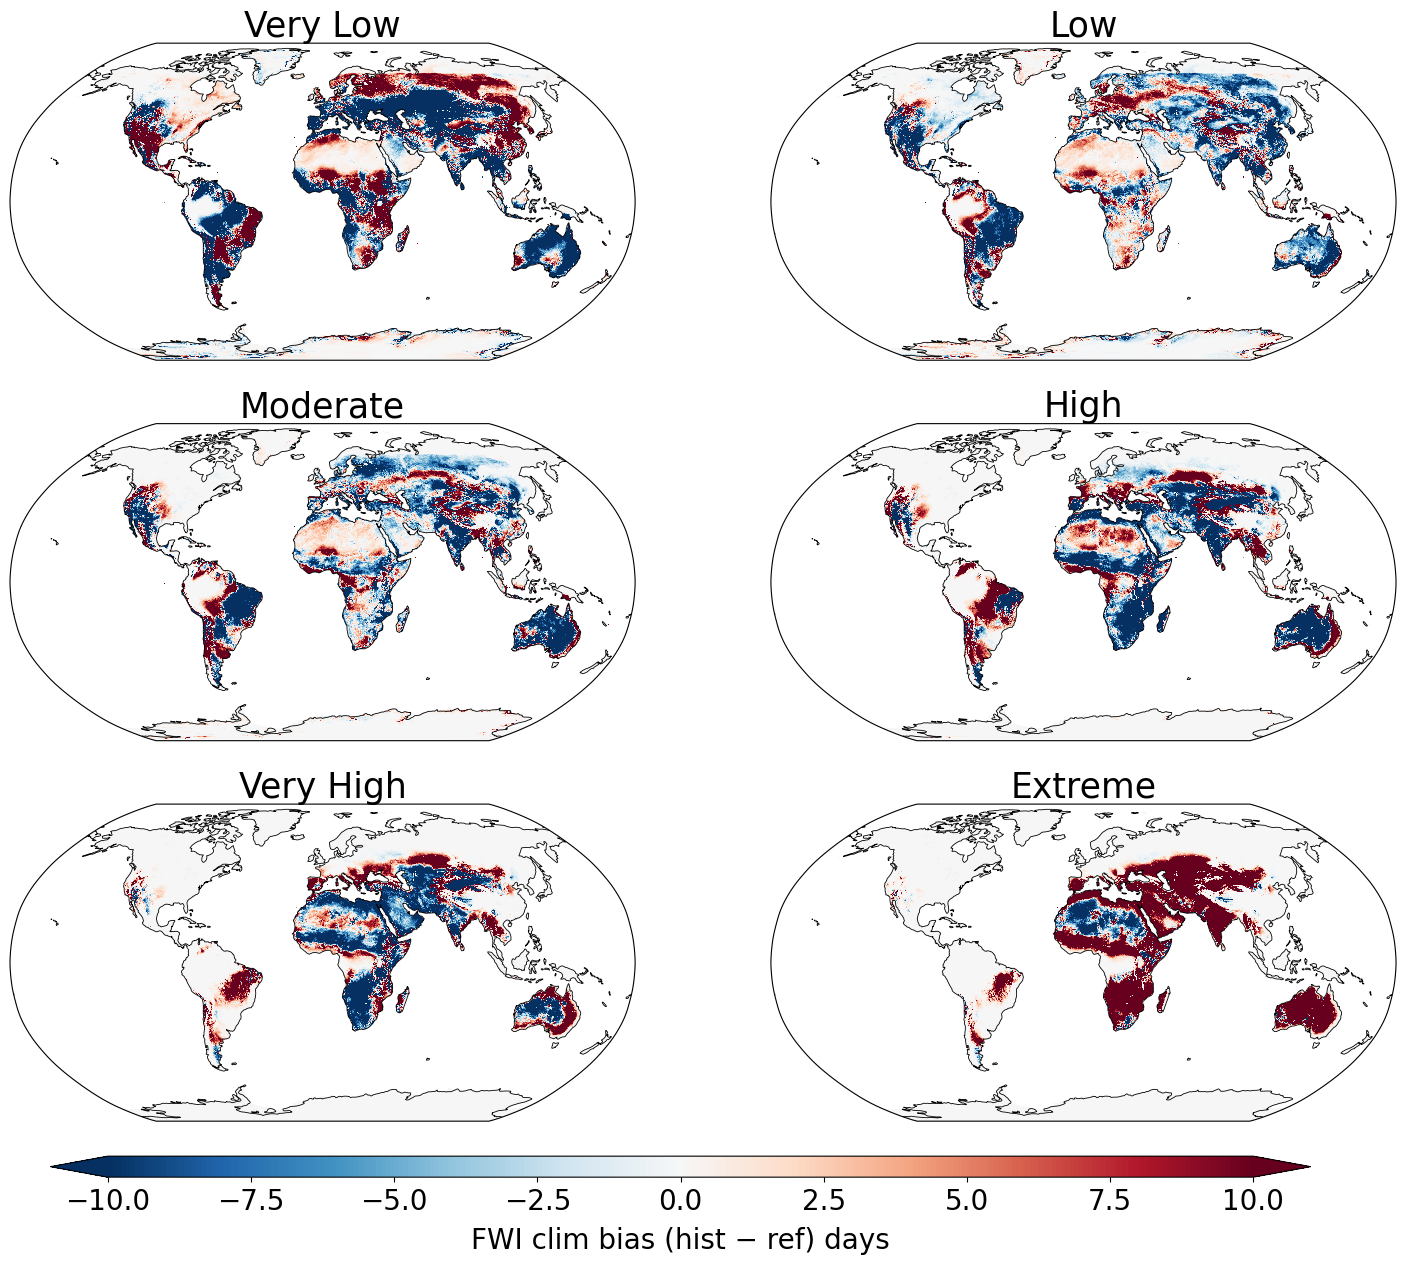

In [36]:
# Plot Global Map Clim Bias
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_VLow_Bias_Land, fwi_Low_Bias_Land, fwi_Mod_Bias_Land,
        fwi_High_Bias_Land, fwi_VHigh_Bias_Land, fwi_Ext_Bias_Land,
    ],    
    titles=["Very Low","Low","Moderate","High","Very High","Extreme"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="RdBu_r", center=0, vmin=-10, vmax=10,
    cbar_label="FWI clim bias (hist − ref) days",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="global",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Global_Clim_Bias_days.png",
    show=True
)

[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Europe_Clim_Bias_global.png


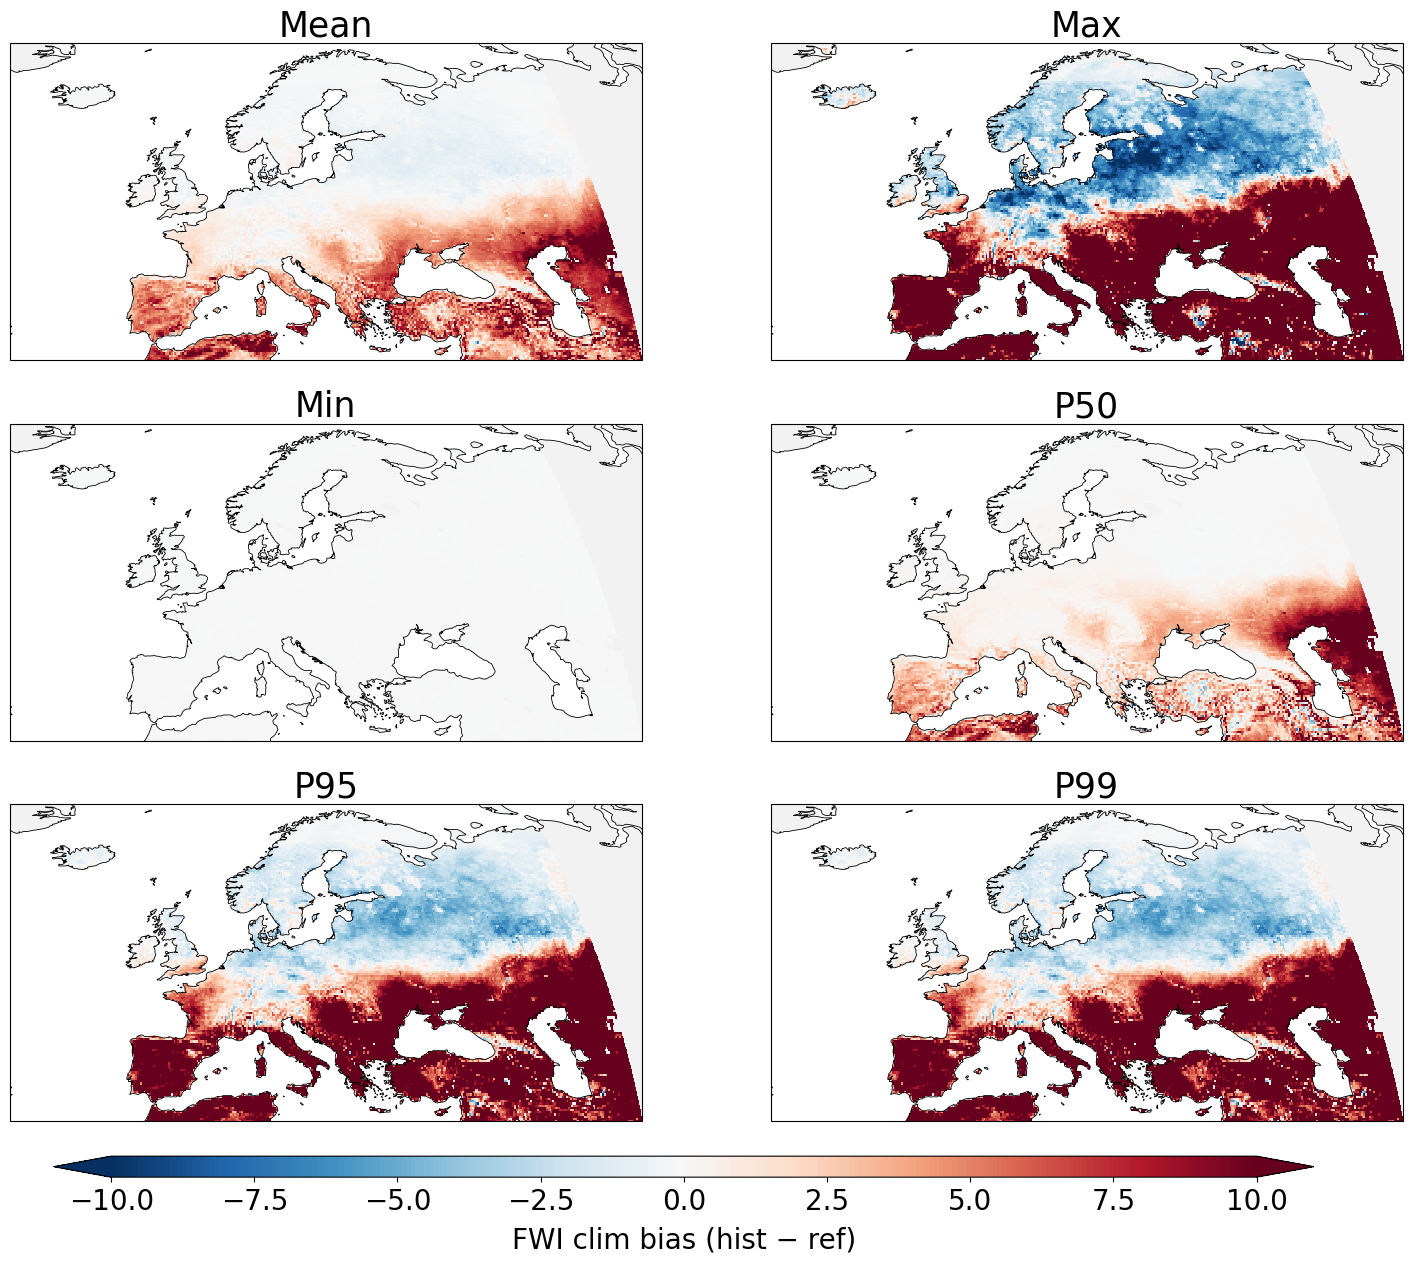

In [38]:
# Plot Europe Map Bias
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_mean_Bias_Land, fwi_max_Bias_Land, fwi_min_Bias_Land,
        fwi_50per_Bias_Land, fwi_95per_Bias_Land, fwi_99per_Bias_Land,
    ],    
    titles=["Mean","Max","Min","P50","P95","P99"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="RdBu_r", center=0, vmin=-10, vmax=10,
    cbar_label="FWI clim bias (hist − ref)",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="europe",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Europe_Clim_Bias_global.png",
    show=True
)

[saved] /Users/poladesu/D_Drive/Prog_FMI/dmin_DtEarth/ClimateDT_Val/FWI_Analysis_Plot/FWI_Europe_Clim_Bias_days.png


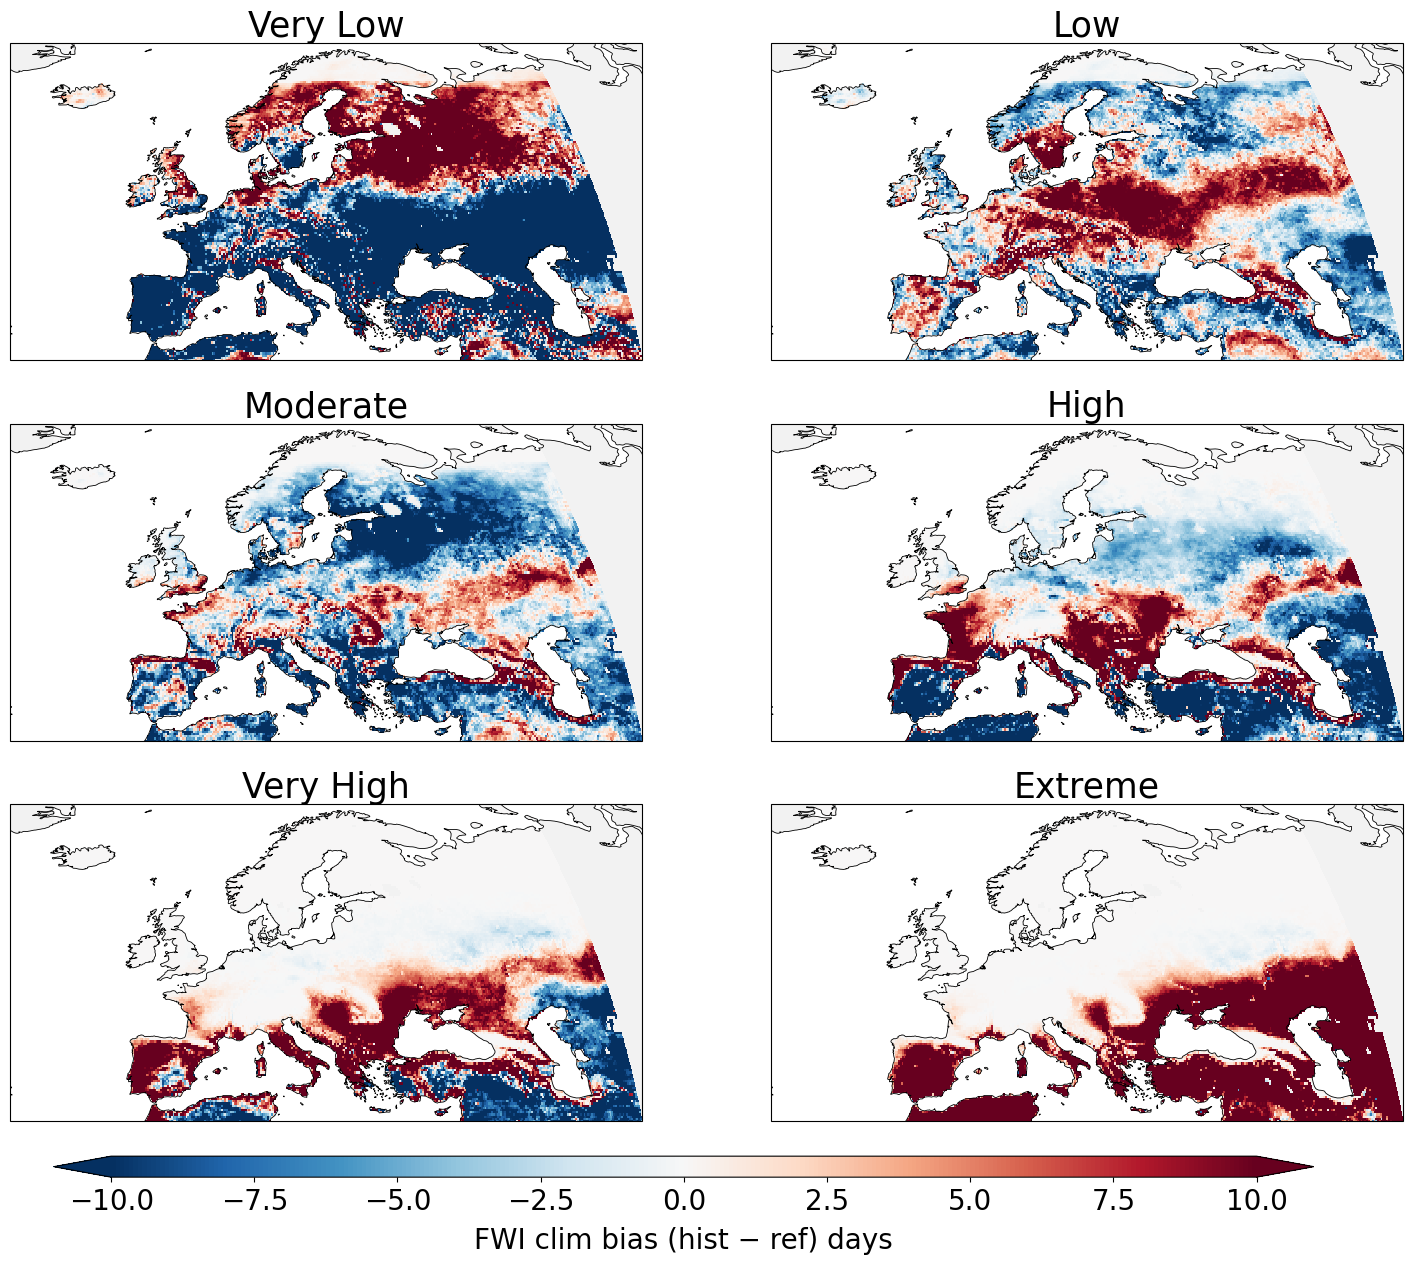

In [39]:
# Plot Europe Map Clim Bias
fig, axes, cb = plot_robinson_panel(
    data_list=[
        fwi_VLow_Bias_Land, fwi_Low_Bias_Land, fwi_Mod_Bias_Land,
        fwi_High_Bias_Land, fwi_VHigh_Bias_Land, fwi_Ext_Bias_Land,
    ],    
    titles=["Very Low","Low","Moderate","High","Very High","Extreme"],
    nrows=3, ncols=2,
    figsize=(18, 14),
    cmap="RdBu_r", center=0, vmin=-10, vmax=10,
    cbar_label="FWI clim bias (hist − ref) days",
    cbar_length_fig=0.70, cbar_height_fig=0.015, cbar_pad_fig=0.025,
    zoom_to="europe",                         # or "globe" for no crop
    save_png=  plot_dir + "FWI_Europe_Clim_Bias_days.png",
    show=True
)

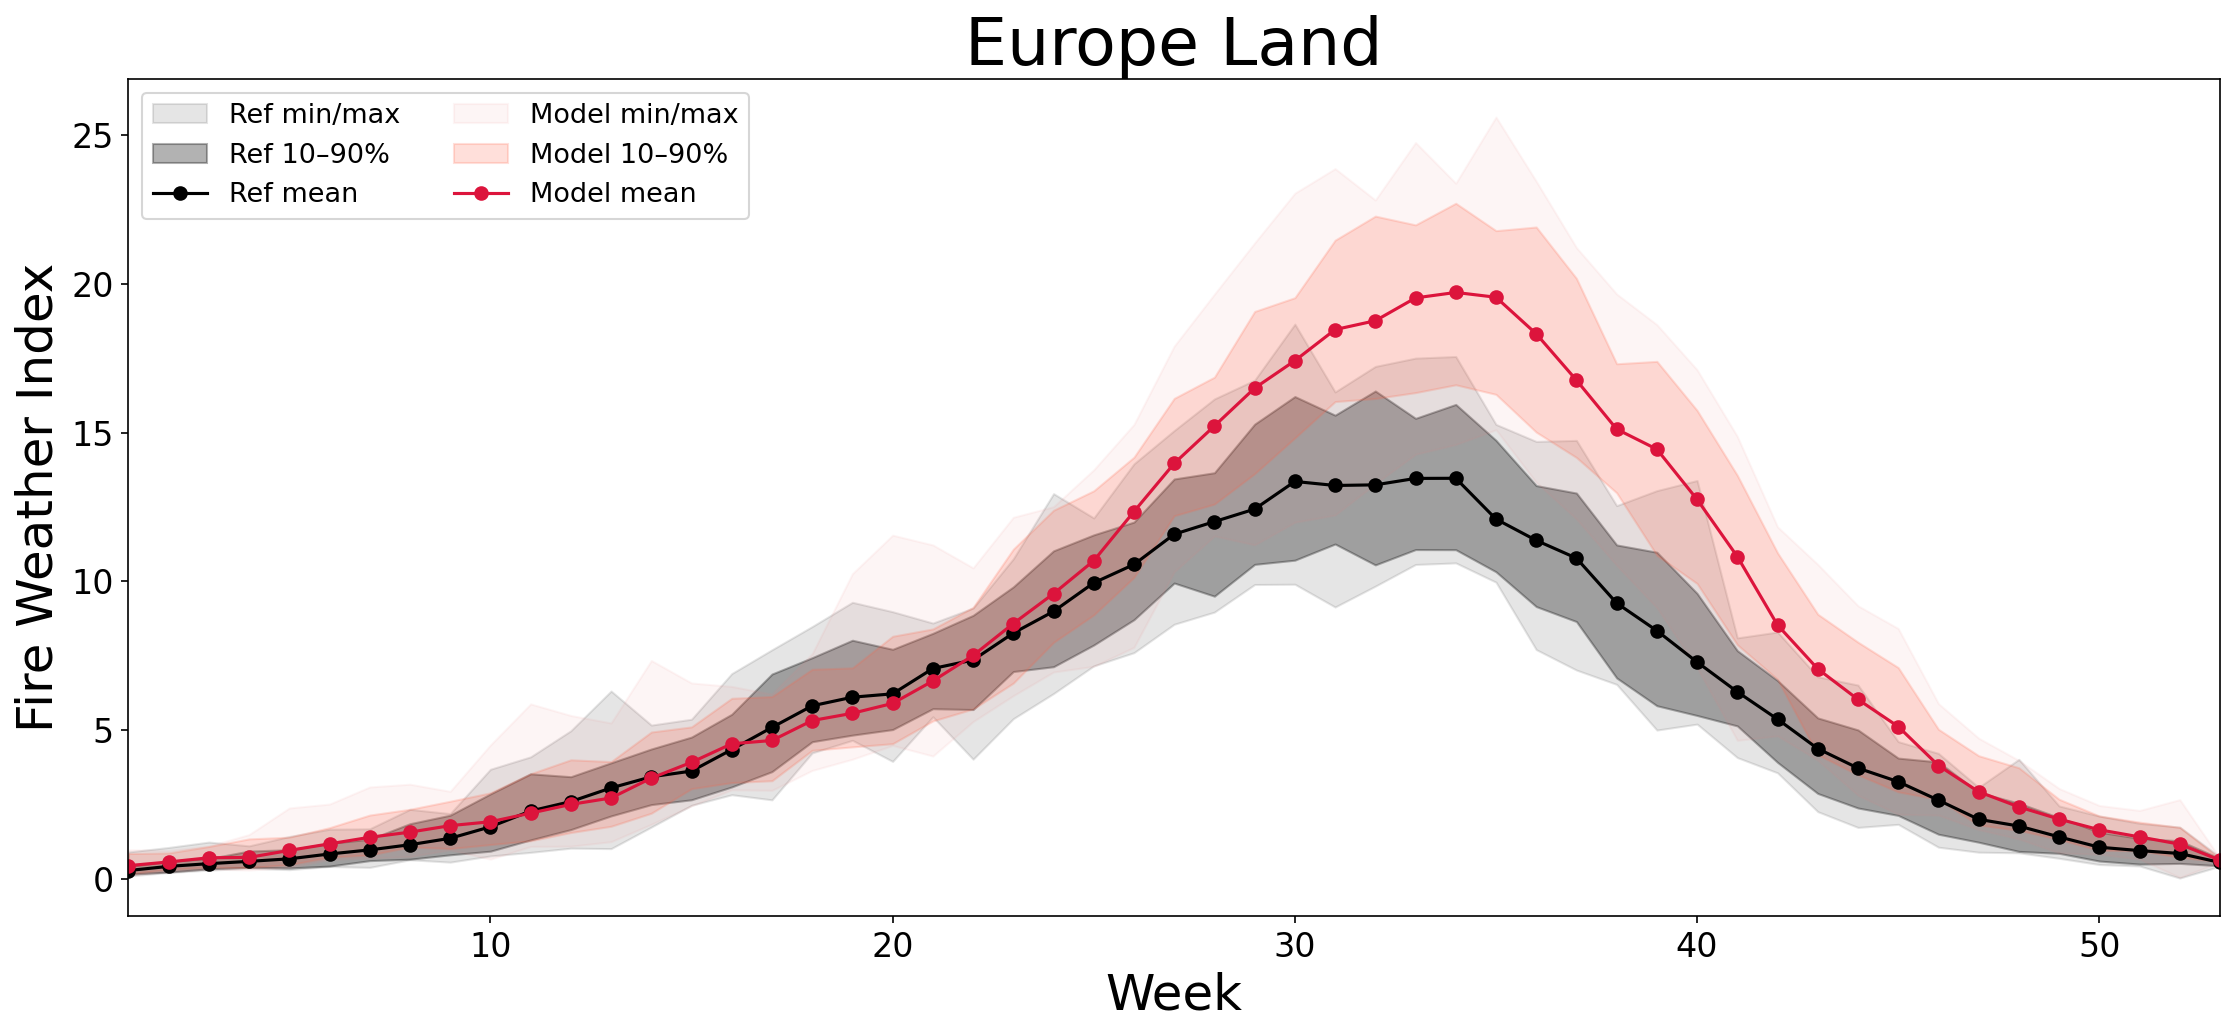

(<Figure size 2250x1050 with 1 Axes>,
 <Axes: title={'center': 'Europe Land'}, xlabel='Week', ylabel='Fire Weather Index'>)

In [37]:

Tit1    = "Europe Land"
fileout = plot_dir + "Ann_cycle_Ref_vs_Model_Europe.png"

plot_seasonal_cycle_ref_vs_model(
    ref_in=ds_fwi_sea_Europe,        # reference dataset (bands + black mean)
    model_in=ds_fwi_sea_Europe_H,    # model dataset (red bands + red mean)
    title=Tit1,
    fileout=fileout,
    var_name="fwi",           # or omit if your DataArrays already selected
    # optional tweaks:
    # ref_minmax_alpha=0.08, ref_qband_alpha=0.25,
    # model_minmax_alpha=0.07, model_qband_alpha=0.18,
)


In [40]:
print(ds_fwi_sea_Europe)

<xarray.Dataset> Size: 92kB
Dimensions:  (time: 7670)
Coordinates:
  * time     (time) datetime64[ns] 61kB 1994-01-01T12:00:00 ... 2014-12-31T12...
    number   int64 8B ...
    expver   <U4 16B ...
Data variables:
    fwi      (time) float32 31kB dask.array<chunksize=(7670,), meta=np.ndarray>


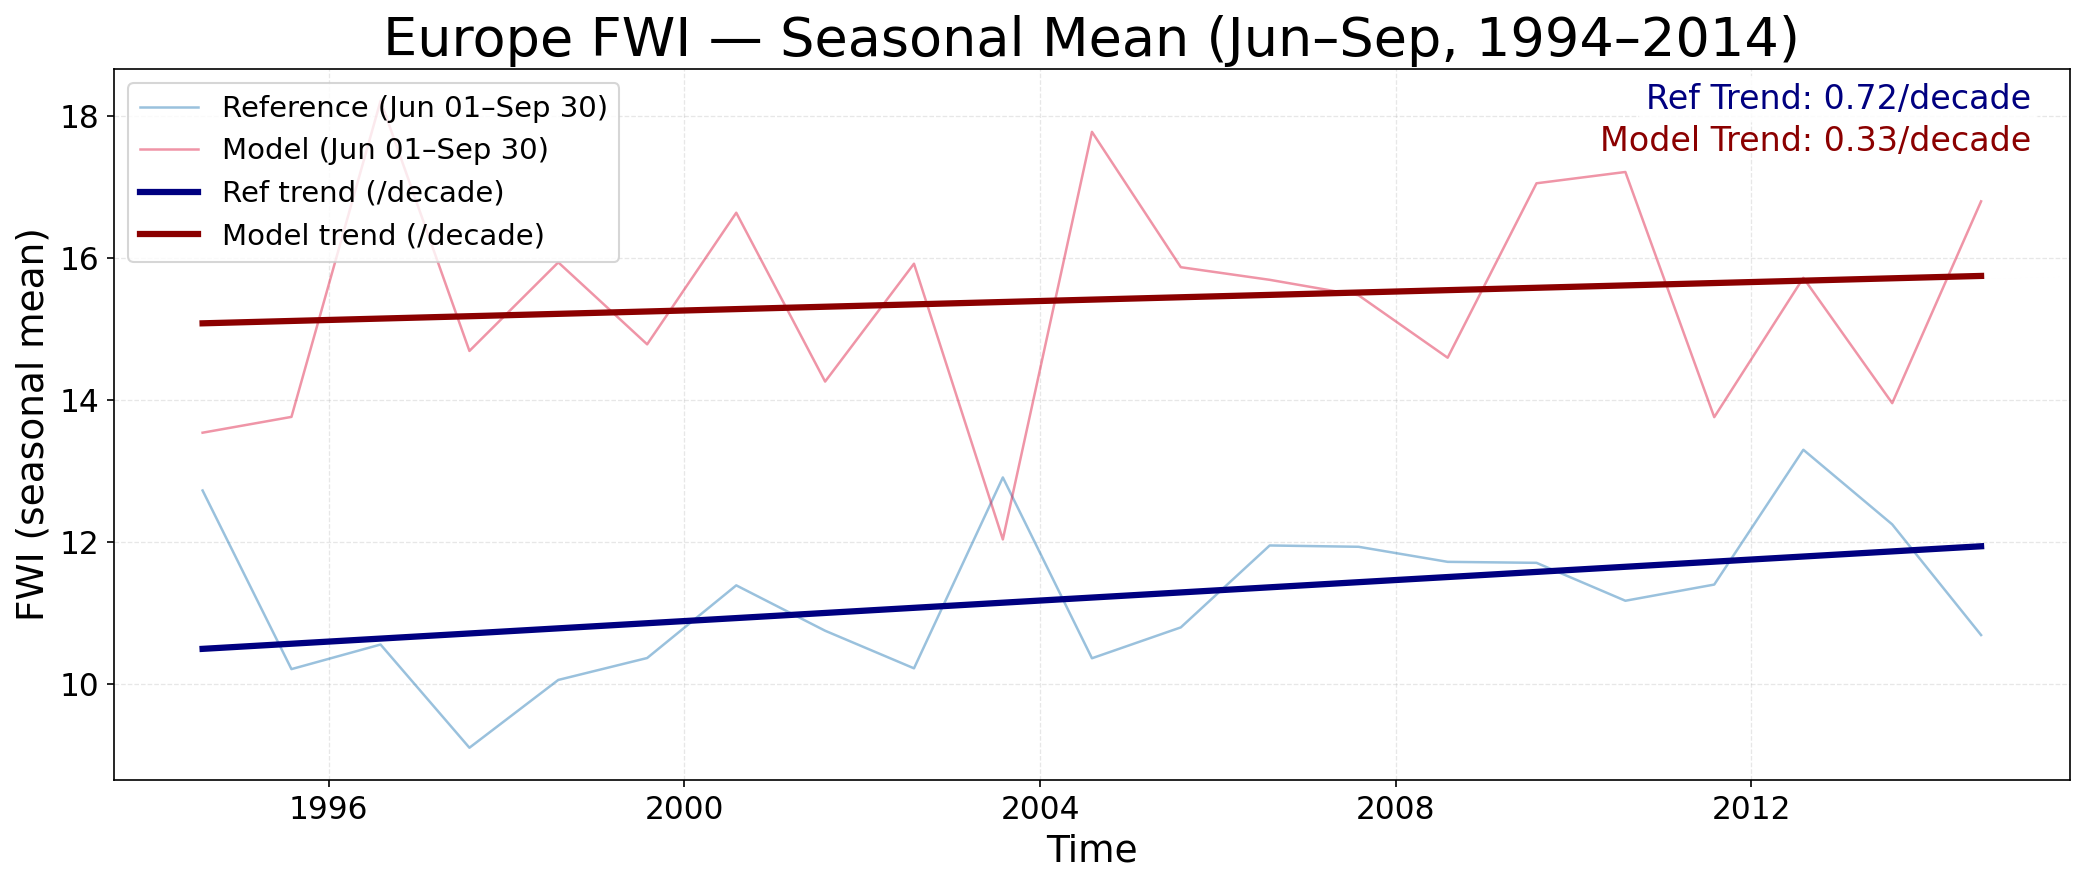

In [52]:
# SEASONAL plot (e.g., June–September mean per year)
out_season = plot_ref_model_timeseries_with_trends(
    ref_ds=ds_fwi_sea_Europe,
    model_ds=ds_fwi_sea_Europe_H,
    title="Europe FWI — Seasonal Mean (Jun–Sep, 1994–2014)",
    fileout = plot_dir + "timeseries_ref_model_trends_Europe_JuneSep.png",
    var_name="fwi",
    time_slice=("1994-01-01", "2014-12-31"),
    season={"start": (6,1), "end": (9,30), "agg": "mean"},  # or "sum"/"median"
    season_point="mid",
    slope_per="decade",
    show=True
)


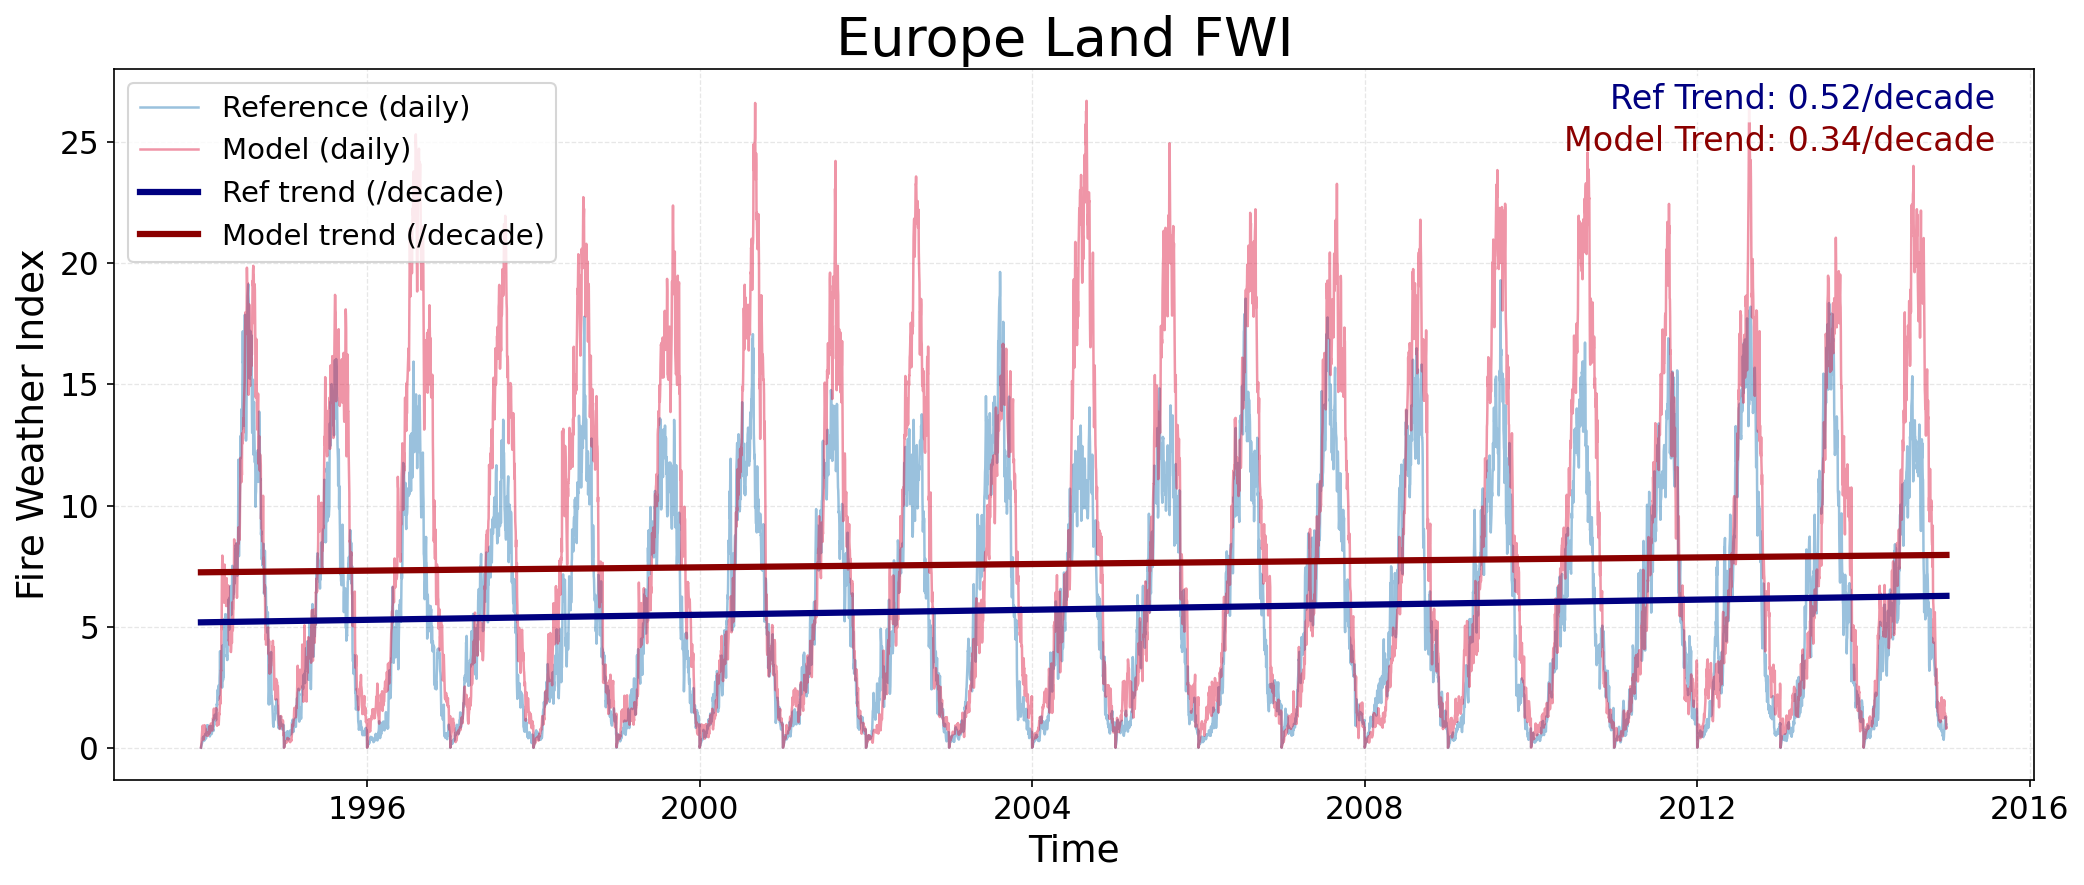

In [53]:
out = plot_ref_model_timeseries_with_trends(
    ref_ds=ds_fwi_sea_Europe,
    model_ds=ds_fwi_sea_Europe_H,
    title="Europe Land FWI ",
    fileout = plot_dir + "timeseries_ref_model_trends_Europe.png",
    var_name="fwi",
    time_slice=("1994-01-01", "2014-12-31"),
    season=None,  # or "sum"/"median"
    slope_per="decade",
    show=True
)

#To switch back to daily plotting, just set season=None (and you can use smoothing="M" or "W" there if you like).
#To handle a season that crosses the year (e.g., Nov–Mar), use:
#season={"start": (11,1), "end": (3,31), "agg": "mean"}



## Validation
The FWI output from the Climate DT IFS-NEMO4.0 low-resolution simulation was validated against the ERA5 reanalysis for the period spanning 1991 to 2000 

## Conclusions

We successfully integrated the FWI application into the end-to-end workflow, demonstrating its capability to operate in real-time streaming configuration. 

## Contributors
Suraj Polade, Finnish Meteorological Institute